# Read Data from MySQL server

In [1]:
from pymysql import *
import xlwt
import pandas.io.sql as sql

con = connect(user="dm_team",password = "DM!$Team@&27920!", host = "18.136.157.135", port =3306,database = "project_itsm")

In [2]:
df = sql.read_sql('select * from dataset_list',con)
print(df)

         CI_Name          CI_Cat                 CI_Subcat        WBS  \
0      SUB000508  subapplication     Web Based Application  WBS000162   
1      WBA000124     application     Web Based Application  WBS000088   
2      DTA000024     application       Desktop Application  WBS000092   
3      WBA000124     application     Web Based Application  WBS000088   
4      WBA000124     application     Web Based Application  WBS000088   
...          ...             ...                       ...        ...   
46601  SBA000464     application  Server Based Application  WBS000073   
46602  SBA000461     application  Server Based Application  WBS000073   
46603  LAP000019        computer                    Laptop  WBS000091   
46604  WBA000058     application     Web Based Application  WBS000073   
46605  DCE000077        hardware       DataCenterEquipment  WBS000267   

      Incident_ID  Status Impact Urgency Priority   number_cnt  ...  \
0       IM0000004  Closed      4       4        4  0

## Saving data as .csv file

In [3]:
df.to_csv("D:\JAN 2021 - MARCH 2021\Datamites\project_itsm.csv")

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import numpy as np
import pandas as pd

## Read contents from saved file

In [6]:
itsm = pd.read_csv('project_itsm.csv')

In [7]:
itsm.shape

(46606, 26)

## Listing the columns present in the data

In [8]:
itsm.columns

Index(['Unnamed: 0', 'CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID',
       'Status', 'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category',
       'KB_number', 'Alert_Status', 'No_of_Reassignments', 'Open_Time',
       'Reopen_Time', 'Resolved_Time', 'Close_Time', 'Handle_Time_hrs',
       'Closure_Code', 'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [9]:
itsm.describe()

Unnamed: 0      Priority    number_cnt  No_of_Reassignments  \
count  46606.00000  45226.000000  46606.000000         46605.000000   
mean   23302.50000      4.215805      0.499658             1.131831   
std    13454.13766      0.705624      0.288634             2.269774   
min        0.00000      1.000000      0.000023             0.000000   
25%    11651.25000      4.000000      0.248213             0.000000   
50%    23302.50000      4.000000      0.500269             0.000000   
75%    34953.75000      5.000000      0.749094             2.000000   
max    46605.00000      5.000000      0.999997            46.000000   

       No_of_Related_Interactions  No_of_Related_Incidents  \
count                46492.000000              1222.000000   
mean                     1.149897                 1.669394   
std                      2.556338                 3.339687   
min                      1.000000                 1.000000   
25%                      1.000000                 1.000000   
50%                      1.000000                 1.000000   
75%                      1.000000                 1.000000   
max                    370.000000                63.000000   

       No_of_Related_Changes  
count             560.000000  
mean                1.058929  
std                 0.403596  
min                 1.000000  
25%                 1.000000  
50%                 1.000000  
75%                 1.000000  
max                 9.000000

In [10]:
#drop irrelavant column
itsm = itsm.drop("Unnamed: 0",axis =1)

In [11]:
itsm.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [12]:
#Check for NULL Values
itsm.isnull().sum()

CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

In [13]:
pd.DataFrame(itsm.corr()*100)

Priority  number_cnt  No_of_Reassignments  \
Priority                    100.000000   -0.083256             8.786701   
number_cnt                   -0.083256  100.000000            -0.168234   
No_of_Reassignments           8.786701   -0.168234           100.000000   
No_of_Related_Interactions   -2.375494    0.085593             3.673254   
No_of_Related_Incidents     -19.327759   -3.694908            -1.910291   
No_of_Related_Changes        -0.853050    7.031830             7.576466   

                            No_of_Related_Interactions  \
Priority                                     -2.375494   
number_cnt                                    0.085593   
No_of_Reassignments                           3.673254   
No_of_Related_Interactions                  100.000000   
No_of_Related_Incidents                      22.073485   
No_of_Related_Changes                         2.686347   

                            No_of_Related_Incidents  No_of_Related_Changes  
Priority                                 -19.327759              -0.853050  
number_cnt                                -3.694908               7.031830  
No_of_Reassignments                       -1.910291               7.576466  
No_of_Related_Interactions                22.073485               2.686347  
No_of_Related_Incidents                  100.000000              -6.661642  
No_of_Related_Changes                     -6.661642             100.000000

##### Few columns with numeric values are in string type.

### Checking total number for each type of value in feature columns and perform data munging

In [13]:
itsm['CI_Cat'].value_counts()

application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: CI_Cat, dtype: int64

In [14]:
# Replace few similar values to one common name

itsm.CI_Cat.replace('database','storage',inplace=True)
itsm.CI_Cat.replace('applicationcomponent','subapplication',inplace=True)
itsm.CI_Cat.replace(['displaydevice','officeelectronics','Phone','networkcomponents'],'hardware',inplace=True)
itsm.CI_Cat.replace(np.nan,'application',inplace=True)

In [15]:
itsm['CI_Cat'].value_counts()

application       33011
subapplication     7787
computer           3643
storage             917
hardware            915
software            333
Name: CI_Cat, dtype: int64

In [16]:
itsm['CI_Cat'].isnull().sum()

0

In [17]:
#Increasing the display parameters
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [18]:
print(itsm['CI_Subcat'].value_counts())

Server Based Application           18811
Web Based Application              15311
Desktop Application                 3876
Laptop                              1921
SAP                                 1199
Banking Device                       916
Citrix                               767
SAN                                  549
Client Based Application             492
Desktop                              423
DataCenterEquipment                  277
System Software                      272
Monitor                              212
Database                             211
Windows Server                       153
Controller                           146
Exchange                             130
Printer                               88
Omgeving                              86
Standard Application                  85
Scanner                               64
MigratieDummy                         60
Linux Server                          55
Automation Software                   55
Encryption      

In [19]:
itsm.CI_Subcat.replace('Desktop','Desktop Application',inplace=True)
itsm.CI_Subcat.replace(['Application Server','Virtual Tape Server','ESX Server','zOS Server','Neoview Server','X86 Server',
                       'Unix Server','Oracle Server','Windows Server in extern beheer','Thin Client','NonStop Server',
                       'Number','Windows Server','Linux Server',np.nan,'SharePoint Farm','Lines'],
                       'Server Based Application',inplace=True)
itsm.CI_Subcat.replace('RAC Service','Banking Device',inplace=True)
itsm.CI_Subcat.replace(['Iptelephony','Protocol','Net Device','IPtelephony','ESX Cluster','Standard Application'],
                       'Web Based Application',inplace=True)
itsm.CI_Subcat.replace(['VMWare','Security Software','zOS Systeem','Firewall','Database Software','VDI','Instance',
                       'MQ Queue Manager','Automation Software','Citrix','SAP','Encryption'],'System Software',inplace=True)
itsm.CI_Subcat.replace(['UPS','Omgeving'],'Client Based Application',inplace=True)
itsm.CI_Subcat.replace(['NonStop Storage','NonStop Harddisk','Tape Library','zOS Cluster','DataCenterEquipment',
                       'MigratieDummy'],'Database',inplace=True)
itsm.CI_Subcat.replace(['Modem','Router'],'Network Component',inplace=True)
itsm.CI_Subcat.replace('KVM Switches','Switch',inplace=True)

In [20]:
print(itsm['CI_Subcat'].value_counts())

Server Based Application    19208
Web Based Application       15422
Desktop Application          4299
System Software              2363
Laptop                       1921
Banking Device                917
Client Based Application      579
Database                      570
SAN                           549
Monitor                       212
Controller                    146
Exchange                      130
Printer                        88
Scanner                        64
Switch                         60
Network Component              51
Keyboard                       27
Name: CI_Subcat, dtype: int64


In [21]:
itsm['CI_Subcat'].isnull().sum()

0

In [22]:
#Replace nan with suitable values

itsm.No_of_Related_Interactions.replace(np.nan,1,inplace=True)
itsm.Priority.replace(np.nan,4,inplace=True)
itsm.No_of_Related_Incidents.replace(np.nan,0,inplace=True)
itsm.No_of_Related_Changes.replace(np.nan,0,inplace=True)

In [23]:
itsm.isnull().sum()

CI_Name                           0
CI_Cat                            0
CI_Subcat                         0
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions        0
Related_Interaction               0
No_of_Related_Incidents           0
No_of_Related_Changes             0
Related_Change                46046
dtype: int64

In [24]:
itsm.Impact.value_counts()

4     22556
5     16741
3      5234
NS     1380
2       692
1         3
Name: Impact, dtype: int64

In [25]:
itsm.Impact.replace('NS',0,inplace=True)

In [26]:
itsm.Impact.value_counts()

4    22556
5    16741
3     5234
0     1380
2      692
1        3
Name: Impact, dtype: int64

In [27]:
itsm.Urgency.value_counts()

4               15526
5               12284
4                7062
5                4495
3                4419
3                2117
2                 538
2                 158
1                   5
5 - Very Low        1
1                   1
Name: Urgency, dtype: int64

In [28]:
itsm.Urgency.replace('5 - Very Low',5,inplace=True)

In [29]:
itsm.dtypes

CI_Name                        object
CI_Cat                         object
CI_Subcat                      object
WBS                            object
Incident_ID                    object
Status                         object
Impact                         object
Urgency                        object
Priority                      float64
number_cnt                    float64
Category                       object
KB_number                      object
Alert_Status                   object
No_of_Reassignments           float64
Open_Time                      object
Reopen_Time                    object
Resolved_Time                  object
Close_Time                     object
Handle_Time_hrs                object
Closure_Code                   object
No_of_Related_Interactions    float64
Related_Interaction            object
No_of_Related_Incidents       float64
No_of_Related_Changes         float64
Related_Change                 object
dtype: object

In [30]:
itsm['Urgency']= itsm.Urgency.astype('float64')

In [31]:
itsm['Impact']= itsm.Impact.astype('float64')

In [32]:
itsm.Category.value_counts()

incident                   37748
request for information     8846
complaint                     11
request for change             1
Name: Category, dtype: int64

In [33]:
itsm.Alert_Status.value_counts()

closed    46606
Name: Alert_Status, dtype: int64

In [34]:
itsm.KB_number.value_counts()

KM0001106    1106
KM0000940     864
KM0001444     790
KM0002043     773
KM0001825     725
             ... 
KM0000194       1
KM0000726       1
KM0000771       1
KM0002002       1
KM0001332       1
Name: KB_number, Length: 1825, dtype: int64

In [35]:
itsm.No_of_Reassignments.replace(np.nan,0,inplace=True)

In [36]:
itsm.No_of_Reassignments.value_counts()

0.0     27469
1.0      7268
2.0      5378
3.0      2191
4.0      1606
5.0       721
6.0       622
7.0       329
8.0       246
9.0       170
10.0      146
11.0      101
13.0       61
12.0       58
14.0       47
15.0       43
17.0       27
16.0       25
18.0       14
21.0       11
22.0       10
25.0       10
19.0       10
20.0        7
26.0        7
23.0        5
32.0        3
24.0        3
33.0        3
30.0        3
27.0        2
46.0        1
42.0        1
29.0        1
38.0        1
37.0        1
31.0        1
34.0        1
45.0        1
39.0        1
36.0        1
Name: No_of_Reassignments, dtype: int64

In [37]:
itsm.isnull().sum()

CI_Name                           0
CI_Cat                            0
CI_Subcat                         0
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               0
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions        0
Related_Interaction               0
No_of_Related_Incidents           0
No_of_Related_Changes             0
Related_Change                46046
dtype: int64

## EDA

In [38]:
import seaborn as sb
import matplotlib.pyplot as plt

In [39]:
import cufflinks as cf
import chart_studio.plotly as py
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
init_notebook_mode(connected=True)
cf.go_offline()

In [40]:
px.scatter(itsm, x='Priority', y='CI_Cat', color="Impact")

### Priority is the dependent variable for first case

## Correlation

In [41]:
itsm.corr(method ='pearson') 

Impact   Urgency  Priority  number_cnt  \
Impact                      1.000000  0.856382  0.727519    0.003134   
Urgency                     0.856382  1.000000  0.962714    0.000817   
Priority                    0.727519  0.962714  1.000000   -0.000574   
number_cnt                  0.003134  0.000817 -0.000574    1.000000   
No_of_Reassignments         0.077383  0.090753  0.088205   -0.001697   
No_of_Related_Interactions -0.014217 -0.022843 -0.023669    0.000870   
No_of_Related_Incidents    -0.048593 -0.064815 -0.066388   -0.005478   
No_of_Related_Changes      -0.042200 -0.045624 -0.042210    0.002851   

                            No_of_Reassignments  No_of_Related_Interactions  \
Impact                                 0.077383                   -0.014217   
Urgency                                0.090753                   -0.022843   
Priority                               0.088205                   -0.023669   
number_cnt                            -0.001697                    0.000870   
No_of_Reassignments                    1.000000                    0.036764   
No_of_Related_Interactions             0.036764                    1.000000   
No_of_Related_Incidents                0.026646                    0.103612   
No_of_Related_Changes                  0.008098                    0.023352   

                            No_of_Related_Incidents  No_of_Related_Changes  
Impact                                    -0.048593              -0.042200  
Urgency                                   -0.064815              -0.045624  
Priority                                  -0.066388              -0.042210  
number_cnt                                -0.005478               0.002851  
No_of_Reassignments                        0.026646               0.008098  
No_of_Related_Interactions                 0.103612               0.023352  
No_of_Related_Incidents                    1.000000               0.038329  
No_of_Related_Changes                      0.038329               1.000000

In [42]:
itsm.corr(method ='kendall')

Impact   Urgency  Priority  number_cnt  \
Impact                      1.000000  0.968614  0.941494    0.001500   
Urgency                     0.968614  1.000000  0.958906    0.001188   
Priority                    0.941494  0.958906  1.000000    0.000229   
number_cnt                  0.001500  0.001188  0.000229    1.000000   
No_of_Reassignments         0.095284  0.097983  0.096976    0.000705   
No_of_Related_Interactions  0.013141  0.012175  0.010418    0.004397   
No_of_Related_Incidents    -0.055806 -0.056877 -0.055244   -0.000109   
No_of_Related_Changes      -0.041298 -0.041920 -0.038607    0.000101   

                            No_of_Reassignments  No_of_Related_Interactions  \
Impact                                 0.095284                    0.013141   
Urgency                                0.097983                    0.012175   
Priority                               0.096976                    0.010418   
number_cnt                             0.000705                    0.004397   
No_of_Reassignments                    1.000000                    0.175176   
No_of_Related_Interactions             0.175176                    1.000000   
No_of_Related_Incidents                0.033800                    0.041762   
No_of_Related_Changes                 -0.015181                    0.003795   

                            No_of_Related_Incidents  No_of_Related_Changes  
Impact                                    -0.055806              -0.041298  
Urgency                                   -0.056877              -0.041920  
Priority                                  -0.055244              -0.038607  
number_cnt                                -0.000109               0.000101  
No_of_Reassignments                        0.033800              -0.015181  
No_of_Related_Interactions                 0.041762               0.003795  
No_of_Related_Incidents                    1.000000               0.045173  
No_of_Related_Changes                      0.045173               1.000000

## Urgency and Impact has high correlation with Priority

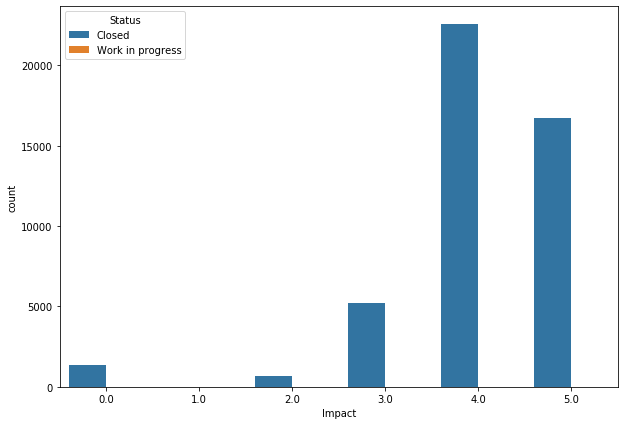

In [43]:
fig, ax = plt.subplots(figsize=(10,7))
sb.countplot(hue='Status',x='Impact',data=itsm)

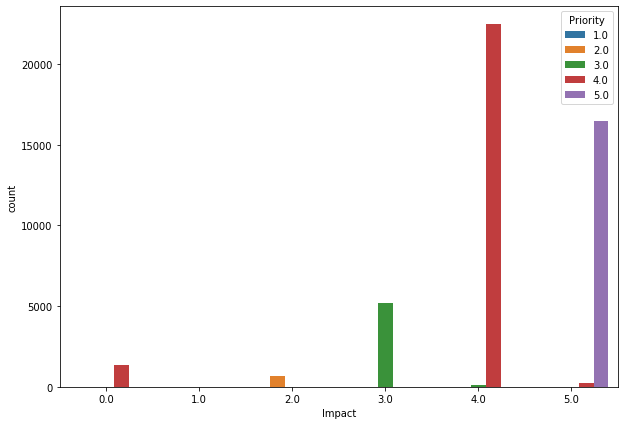

In [44]:
fig, ax = plt.subplots(figsize=(10,7))
sb.countplot(hue='Priority',x='Impact',data=itsm)

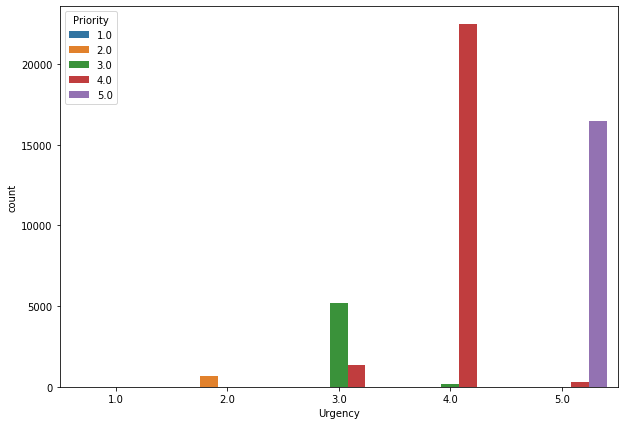

In [45]:
fig, ax = plt.subplots(figsize=(10,7))
sb.countplot(hue='Priority',x='Urgency',data=itsm)

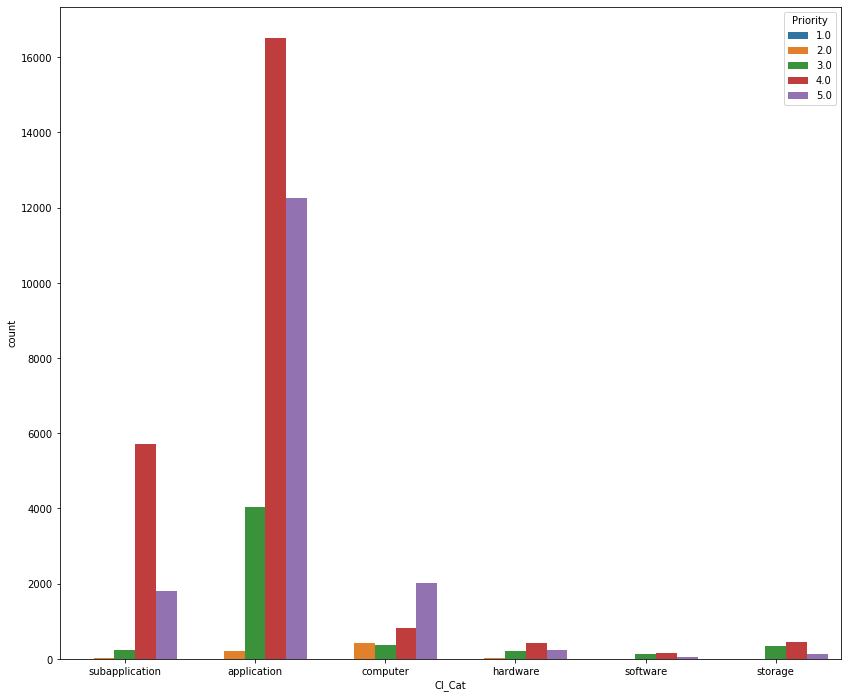

In [46]:
fig, ax = plt.subplots(figsize=(14,12))
sb.countplot(x="CI_Cat", hue = "Priority", data= itsm)

In [47]:
Status_val = itsm['Priority'].value_counts()
Status_df = pd.DataFrame({'labels': Status_val.index,'values': Status_val.values})
Status_df.iplot(kind='pie',labels='labels',values='values', title='Priority', hole = 0.2)

In [48]:
itsm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46606 non-null  object 
 2   CI_Subcat                   46606 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  float64
 7   Urgency                     46606 non-null  float64
 8   Priority                    46606 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status                46606 non-null  object 
 13  No_of_Reassignments         466

In [49]:
pd.crosstab(itsm['Priority'],itsm['Impact'],margins = True)

Impact     0.0  1.0  2.0   3.0    4.0    5.0    All
Priority                                           
1.0          0    3    0     0      0      0      3
2.0          0    0  692     5      0      0    697
3.0          0    0    0  5221    100      2   5323
4.0       1380    0    0     8  22456    253  24097
5.0          0    0    0     0      0  16486  16486
All       1380    3  692  5234  22556  16741  46606

In [50]:
pd.crosstab(itsm['Priority'],itsm['Urgency'],margins = True)

Urgency   1.0  2.0   3.0    4.0    5.0    All
Priority                                     
1.0         3    0     0      0      0      3
2.0         2  692     3      0      0    697
3.0         1    4  5174    144      0   5323
4.0         0    0  1359  22444    294  24097
5.0         0    0     0      0  16486  16486
All         6  696  6536  22588  16780  46606

# Case 1: Predicting Priority

In [51]:
import datetime as dt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import itertools
import statsmodels.api as sm

In [52]:
X = itsm.loc[:,['Impact','Urgency','No_of_Reassignments']]
y = itsm.Priority

In [53]:
# Splitting the data into test and train for calculating accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [54]:
# Standardization technique
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [55]:
X_train.shape

(32624, 3)

In [56]:
X_test.shape

(13982, 3)

In [57]:
# Training the model
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf',C=10,gamma=0.1).fit(X_train,y_train)

In [58]:
# Predicting the model
y_predict_svm = rbf_svc.predict(X_test)

In [59]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))

1.0
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00       210
         3.0       1.00      1.00      1.00      1581
         4.0       1.00      1.00      1.00      7254
         5.0       1.00      1.00      1.00      4936

    accuracy                           1.00     13982
   macro avg       1.00      1.00      1.00     13982
weighted avg       1.00      1.00      1.00     13982



In [60]:
confusion_matrix(y_test,y_predict_svm)

array([[   1,    0,    0,    0,    0],
       [   0,  210,    0,    0,    0],
       [   0,    0, 1581,    0,    0],
       [   0,    0,    0, 7254,    0],
       [   0,    0,    0,    0, 4936]], dtype=int64)

In [61]:
pd.crosstab(y_test,y_predict_svm)

col_0     1.0  2.0   3.0   4.0   5.0
Priority                            
1.0         1    0     0     0     0
2.0         0  210     0     0     0
3.0         0    0  1581     0     0
4.0         0    0     0  7254     0
5.0         0    0     0     0  4936

In [62]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
model_dtree=DecisionTreeClassifier()
model_dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [63]:
# Predicting the model
y_predict_dtree = model_dtree.predict(X_test)

In [64]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dtree))
print(classification_report(y_test,y_predict_dtree))

1.0
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00       210
         3.0       1.00      1.00      1.00      1581
         4.0       1.00      1.00      1.00      7254
         5.0       1.00      1.00      1.00      4936

    accuracy                           1.00     13982
   macro avg       1.00      1.00      1.00     13982
weighted avg       1.00      1.00      1.00     13982



In [66]:
import pickle
pickle.dump(model_dtree, open('DTITSM.pkl', 'wb'))

In [67]:
# Training the model
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth=27)
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=27)

In [68]:
# Predicting the model
y_predict_rf = model_rf.predict(X_test)

In [69]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.9998569589472178
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       1.00      1.00      1.00       210
         3.0       1.00      1.00      1.00      1581
         4.0       1.00      1.00      1.00      7254
         5.0       1.00      1.00      1.00      4936

    accuracy                           1.00     13982
   macro avg       0.80      0.80      0.80     13982
weighted avg       1.00      1.00      1.00     13982



In [71]:
confusion_matrix(y_test,y_predict_rf)

array([[   0,    1,    0,    0,    0],
       [   0,  210,    0,    0,    0],
       [   0,    0, 1580,    1,    0],
       [   0,    0,    0, 7254,    0],
       [   0,    0,    0,    0, 4936]], dtype=int64)

In [72]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=12,metric='euclidean') # Maximum accuracy for n=10
model_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=12)

In [73]:
# Predicting the model
y_predict_knn = model_knn.predict(X_test)

In [74]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))

0.9994278357888714
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       1.00      0.99      0.99       210
         3.0       1.00      1.00      1.00      1581
         4.0       1.00      1.00      1.00      7254
         5.0       1.00      1.00      1.00      4936

    accuracy                           1.00     13982
   macro avg       0.80      0.80      0.80     13982
weighted avg       1.00      1.00      1.00     13982



In [75]:
confusion_matrix(y_test,y_predict_knn)

array([[   0,    1,    0,    0,    0],
       [   0,  208,    2,    0,    0],
       [   0,    0, 1579,    2,    0],
       [   0,    0,    3, 7251,    0],
       [   0,    0,    0,    0, 4936]], dtype=int64)

In [76]:
# Training the model
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
# Predicting the model
y_predict_xgb = model_xgb.predict(X_test)

In [78]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_xgb))
print(classification_report(y_test,y_predict_xgb))

0.9997139178944358
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       1.00      0.99      0.99       210
         3.0       1.00      1.00      1.00      1581
         4.0       1.00      1.00      1.00      7254
         5.0       1.00      1.00      1.00      4936

    accuracy                           1.00     13982
   macro avg       0.80      0.80      0.80     13982
weighted avg       1.00      1.00      1.00     13982



In [79]:
confusion_matrix(y_test,y_predict_xgb)

array([[   0,    1,    0,    0,    0],
       [   0,  208,    2,    0,    0],
       [   0,    0, 1580,    1,    0],
       [   0,    0,    0, 7254,    0],
       [   0,    0,    0,    0, 4936]], dtype=int64)

In [80]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier()
model_mlp.fit(X_train,y_train)

MLPClassifier()

In [81]:
# Predicting the model
y_predict_mlp = model_mlp.predict(X_test)

In [82]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_mlp))
print(classification_report(y_test,y_predict_mlp))

0.9998569589472178
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       1.00      1.00      1.00       210
         3.0       1.00      1.00      1.00      1581
         4.0       1.00      1.00      1.00      7254
         5.0       1.00      1.00      1.00      4936

    accuracy                           1.00     13982
   macro avg       0.80      0.80      0.80     13982
weighted avg       1.00      1.00      1.00     13982



In [83]:
confusion_matrix(y_test,y_predict_mlp)

array([[   0,    1,    0,    0,    0],
       [   0,  209,    1,    0,    0],
       [   0,    0, 1581,    0,    0],
       [   0,    0,    0, 7254,    0],
       [   0,    0,    0,    0, 4936]], dtype=int64)

# Case 2: Forecast the incident Volume

In [84]:
itsm.Open_Time.head(3)

0    05-02-2012 13:32
1    12-03-2012 15:44
2    29-03-2012 12:36
Name: Open_Time, dtype: object

In [85]:
# Imporing the necessary columns
incfrq = itsm.loc[:,['Incident_ID','Open_Time']]
incfrq.head()

Incident_ID         Open_Time
0   IM0000004  05-02-2012 13:32
1   IM0000005  12-03-2012 15:44
2   IM0000006  29-03-2012 12:36
3   IM0000011  17-07-2012 11:49
4   IM0000012  10-08-2012 11:01

In [86]:
itsm.Open_Time.value_counts()

24-03-2014 08:54    7
31-12-2013 09:13    6
07-02-2014 10:44    6
21-02-2014 15:01    6
27-01-2014 10:14    6
                   ..
18-12-2013 14:31    1
11-09-2013 08:35    1
21-01-2014 16:08    1
05-11-2013 12:58    1
14-11-2013 14:44    1
Name: Open_Time, Length: 34636, dtype: int64

In [87]:
# Coverting all the values in proper Datetime format
for i in range(len(incfrq.Open_Time)):
    if (incfrq.Open_Time[i][1]=='/'):
        incfrq.Open_Time[i] = dt.datetime.strptime(incfrq.Open_Time[i],'%d/%m/%Y %H:%M').date()
    elif (incfrq.Open_Time[i][2]=='/'):
        incfrq.Open_Time[i] = dt.datetime.strptime(incfrq.Open_Time[i],'%d/%m/%Y %H:%M').date()
    else:
        incfrq.Open_Time[i] = dt.datetime.strptime(incfrq.Open_Time[i],'%d-%m-%Y %H:%M').date()

In [88]:
# Adding a new column which will have the number of tickets per day
incfrq['No_Incidents'] = incfrq.groupby('Open_Time')['Incident_ID'].transform('count')
incfrq.drop(['Incident_ID'],axis=1,inplace=True)
incfrq.drop_duplicates(inplace=True)
incfrq.head()

Open_Time  No_Incidents
0  2012-02-05             1
1  2012-03-12             1
2  2012-03-29             1
3  2012-07-17             1
4  2012-08-10             2

In [89]:
# Setting Date as the Index
incfrq = incfrq.set_index('Open_Time')
incfrq.index = pd.to_datetime(incfrq.index)
incfrq.index

DatetimeIndex(['2012-02-05', '2012-03-12', '2012-03-29', '2012-07-17',
               '2012-08-10', '2012-08-15', '2012-08-22', '2012-08-29',
               '2012-09-03', '2012-09-21',
               ...
               '2014-03-22', '2014-03-24', '2014-03-23', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=331, freq=None)

In [90]:
incfrq.head()

No_Incidents
Open_Time               
2012-02-05             1
2012-03-12             1
2012-03-29             1
2012-07-17             1
2012-08-10             2

In [91]:
print(incfrq.index.min(),'to',incfrq.index.max())

2012-02-05 00:00:00 to 2014-03-31 00:00:00


In [92]:
# Making a new Series with frequency as Day
data1 = incfrq['No_Incidents']
data1 = data1.asfreq('D')
data1.index

DatetimeIndex(['2012-02-05', '2012-02-06', '2012-02-07', '2012-02-08',
               '2012-02-09', '2012-02-10', '2012-02-11', '2012-02-12',
               '2012-02-13', '2012-02-14',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=786, freq='D')

In [93]:
data1.head()

Open_Time
2012-02-05    1.0
2012-02-06    NaN
2012-02-07    NaN
2012-02-08    NaN
2012-02-09    NaN
Freq: D, Name: No_Incidents, dtype: float64

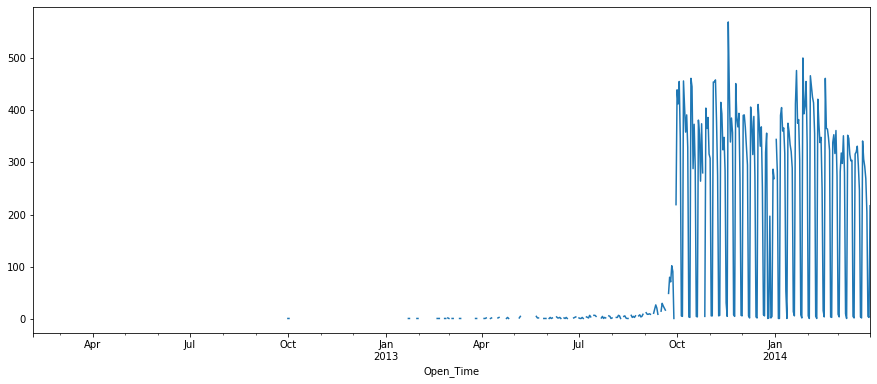

In [94]:
# Plotting number of tickets per day
data1.plot(figsize=(15,6))
plt.show()

In [95]:
# Since not many tickets before October 2013, we consider only the latter values
incfrom2013 = incfrq[incfrq.index > dt.datetime(2013,10,1)]

In [96]:
incfrom2013.head()

No_Incidents
Open_Time               
2013-10-02           412
2013-10-03           455
2013-10-04           345
2013-10-07           456
2013-10-05             6

In [97]:
# new Series
data2 = incfrom2013['No_Incidents']
data2 = data2.asfreq('D')
data2.index

DatetimeIndex(['2013-10-02', '2013-10-03', '2013-10-04', '2013-10-05',
               '2013-10-06', '2013-10-07', '2013-10-08', '2013-10-09',
               '2013-10-10', '2013-10-11',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=181, freq='D')

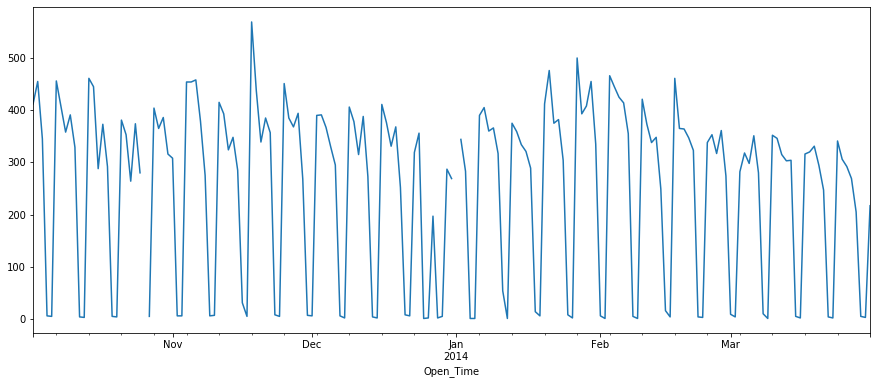

In [98]:
# Plotting number of tickets per day after October 2013
data2.plot(figsize=(15,6))
plt.show()

In [99]:
# Making a list of values for p,d & q
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

In [100]:
# Checking the AIC values per pairs
for param in pdq:
    mod = sm.tsa.statespace.SARIMAX(data2,order=param,enforce_stationarity=False,s=12,enforce_invertibility=False)
    results = mod.fit()
    print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:2539.6180293605685
ARIMA(0, 0, 1) - AIC:2373.785382472224
ARIMA(0, 1, 0) - AIC:2371.128960804689
ARIMA(0, 1, 1) - AIC:2313.1363338175497
ARIMA(1, 0, 0) - AIC:2365.2916469365928
ARIMA(1, 0, 1) - AIC:2337.312508693352
ARIMA(1, 1, 0) - AIC:2373.1280680651544
ARIMA(1, 1, 1) - AIC:2294.4315812436407


In [101]:
# Choosing the model with minimum AIC and the ARIMA Model for Time Series Forecasting
mod = sm.tsa.statespace.SARIMAX(data2,order=(1,1,1))
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3386      0.090      3.771      0.000       0.163       0.515
ma.L1         -0.9989      0.428     -2.332      0.020      -1.839      -0.159
sigma2       2.52e+04   9781.779      2.576      0.010    6023.420    4.44e+04


In [102]:
# Predicting the future values and the confidence interval
pred = results.get_prediction(start=pd.to_datetime('2014-3-3'),end=pd.to_datetime('2014-10-30'),dynamic=False)
pred_ci = pred.conf_int()
pred.predicted_mean.round()

2014-03-03    172.0
2014-03-04    266.0
2014-03-05    279.0
2014-03-06    272.0
2014-03-07    291.0
2014-03-08    267.0
2014-03-09    174.0
2014-03-10    169.0
2014-03-11    289.0
2014-03-12    288.0
2014-03-13    277.0
2014-03-14    273.0
2014-03-15    274.0
2014-03-16    171.0
2014-03-17    169.0
2014-03-18    276.0
2014-03-19    278.0
2014-03-20    282.0
2014-03-21    269.0
2014-03-22    253.0
2014-03-23    170.0
2014-03-24    168.0
2014-03-25    284.0
2014-03-26    272.0
2014-03-27    267.0
2014-03-28    260.0
2014-03-29    238.0
2014-03-30    169.0
2014-03-31    167.0
2014-04-01    240.0
2014-04-02    248.0
2014-04-03    250.0
2014-04-04    251.0
2014-04-05    251.0
2014-04-06    251.0
2014-04-07    251.0
2014-04-08    251.0
2014-04-09    251.0
2014-04-10    252.0
2014-04-11    252.0
2014-04-12    252.0
2014-04-13    252.0
2014-04-14    252.0
2014-04-15    252.0
2014-04-16    252.0
2014-04-17    252.0
2014-04-18    252.0
2014-04-19    252.0
2014-04-20    252.0
2014-04-21    252.0


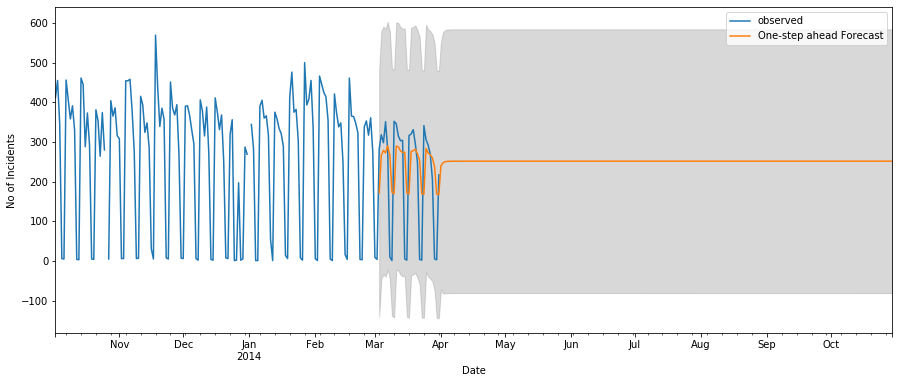

In [103]:
ax = data2['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast',figsize=(15, 6))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='grey',alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('No of Incidents')
plt.legend()
plt.show()

# Case 4: Request For Change (RFC)

In [105]:
# Selecting the predictors
X1 = itsm.loc[:,['CI_Subcat','WBS','Priority','Category','No_of_Related_Interactions','No_of_Related_Incidents']]
y1 = itsm.No_of_Related_Changes

In [106]:
X1.head(2)

CI_Subcat        WBS  Priority  Category  \
0  Web Based Application  WBS000162       4.0  incident   
1  Web Based Application  WBS000088       3.0  incident   

   No_of_Related_Interactions  No_of_Related_Incidents  
0                         1.0                      2.0  
1                         1.0                      1.0

In [107]:
enc= LabelEncoder()
for i in (0,1,3,4):
    X1.iloc[:,i] = enc.fit_transform(X1.iloc[:,i])

In [108]:
# Splitting into train and test for calculating the accuracy
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3,random_state=10)

In [109]:
# Standardization technique is used
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

In [110]:
X1_train.shape

(32624, 6)

In [111]:
X1_test.shape

(13982, 6)

In [112]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
model1_dtree=DecisionTreeClassifier()
model1_dtree.fit(X1_train,y1_train)

DecisionTreeClassifier()

In [113]:
# Predicting the model
y1_predict_dtree = model1_dtree.predict(X1_test)

In [114]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y1_test,y1_predict_dtree))
print(classification_report(y1_test,y1_predict_dtree))

0.9883421541982549
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     13835
         1.0       0.17      0.03      0.05       138
         2.0       0.00      0.00      0.00         8
         3.0       0.00      0.00      0.00         1

    accuracy                           0.99     13982
   macro avg       0.29      0.26      0.26     13982
weighted avg       0.98      0.99      0.98     13982



In [115]:
confusion_matrix(y1_test,y1_predict_dtree)

array([[13815,    19,     1,     0],
       [  134,     4,     0,     0],
       [    8,     0,     0,     0],
       [    1,     0,     0,     0]], dtype=int64)

In [116]:
# Training the model
from sklearn.ensemble import RandomForestClassifier
model1_rf = RandomForestClassifier()
model1_rf.fit(X1_train,y1_train)

RandomForestClassifier()

In [117]:
# Predicting the model
y1_predict_rf = model1_rf.predict(X1_test)

In [118]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y1_test,y1_predict_rf))
print(classification_report(y1_test,y1_predict_rf))

0.9890573594621657
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     13835
         1.0       0.20      0.01      0.03       138
         2.0       0.00      0.00      0.00         8
         3.0       0.00      0.00      0.00         1

    accuracy                           0.99     13982
   macro avg       0.30      0.25      0.26     13982
weighted avg       0.98      0.99      0.98     13982



In [119]:
confusion_matrix(y1_test,y1_predict_rf)

array([[13827,     8,     0,     0],
       [  136,     2,     0,     0],
       [    8,     0,     0,     0],
       [    1,     0,     0,     0]], dtype=int64)

In [120]:
# Exporting the trained model
joblib.dump(model1_dtree,'Predict_RFC.ml')

['Predict_RFC.ml']

In [132]:
itsm.tail()

CI_Name       CI_Cat                 CI_Subcat        WBS  \
46601  SBA000464  application  Server Based Application  WBS000073   
46602  SBA000461  application  Server Based Application  WBS000073   
46603  LAP000019     computer                    Laptop  WBS000091   
46604  WBA000058  application     Web Based Application  WBS000073   
46605  DCE000077     hardware                  Database  WBS000267   

      Incident_ID  Status  Impact  Urgency  Priority  number_cnt  Category  \
46601   IM0047053  Closed     4.0      4.0       4.0    0.231896  incident   
46602   IM0047054  Closed     4.0      4.0       4.0    0.805153  incident   
46603   IM0047055  Closed     5.0      5.0       5.0    0.917466  incident   
46604   IM0047056  Closed     4.0      4.0       4.0    0.701278  incident   
46605   IM0047057  Closed     3.0      3.0       3.0    0.902320  incident   

       KB_number Alert_Status  No_of_Reassignments         Open_Time  \
46601  KM0001314       closed                  0.0  31-03-2014 16:23   
46602  KM0002360       closed                  0.0  31-03-2014 15:03   
46603  KM0000315       closed                  0.0  31-03-2014 15:28   
46604  KM0001287       closed                  0.0  31-03-2014 15:35   
46605  KM0000182       closed                  0.0  31-03-2014 17:24   

      Reopen_Time     Resolved_Time        Close_Time Handle_Time_hrs  \
46601         NaN  31-03-2014 16:29  31-03-2014 16:29           0,095   
46602         NaN  31-03-2014 15:29  31-03-2014 15:29     0,428333333   
46603         NaN  31-03-2014 15:32  31-03-2014 15:32     0,071666667   
46604         NaN  31-03-2014 15:42  31-03-2014 15:42     0,116944444   
46605         NaN  31-03-2014 22:47  31-03-2014 22:47     0,586388889   

      Closure_Code  No_of_Related_Interactions Related_Interaction  \
46601        Other                         1.0           SD0147021   
46602   User error                         1.0           SD0146967   
46603     Hardware                         1.0           SD0146982   
46604     Software                         1.0           SD0146986   
46605     Hardware                         1.0           SD0147088   

       No_of_Related_Incidents  No_of_Related_Changes Related_Change  
46601                      0.0                    0.0            NaN  
46602                      0.0                    0.0            NaN  
46603                      0.0                    0.0            NaN  
46604                      0.0                    0.0            NaN  
46605                      0.0                    0.0            NaN

In [133]:
itsm.WBS.value_counts()

WBS000073    13342
WBS000091     2500
WBS000263     2283
WBS000072     2197
WBS000271     1186
WBS000095     1102
WBS000318     1099
WBS000152     1076
WBS000094      861
WBS000146      858
WBS000223      803
WBS000092      784
WBS000128      755
WBS000099      717
WBS000088      619
WBS000228      611
WBS000089      603
WBS000296      582
WBS000292      573
WBS000016      508
WBS000162      495
WBS000199      483
WBS000219      463
WBS000096      418
WBS000307      374
WBS000187      355
WBS000172      328
WBS000125      318
WBS000023      302
WBS000255      291
WBS000013      277
WBS000110      242
WBS000264      232
WBS000043      232
WBS000330      222
WBS000014      219
WBS000093      215
WBS000015      208
WBS000098      208
WBS000025      207
WBS000239      200
WBS000048      191
WBS000102      185
WBS000167      183
WBS000027      166
WBS000054      165
WBS000002      161
WBS000066      154
WBS000077      151
WBS000153      146
WBS000326      143
WBS000017      142
WBS000111   

In [135]:
pd.crosstab(itsm['Priority'],itsm['WBS'])

WBS       WBS000001  WBS000002  WBS000004  WBS000005  WBS000006  WBS000007  \
Priority                                                                     
1.0               0          0          0          0          0          0   
2.0               0          0          0          0          3          0   
3.0               0          7          0          2         14         10   
4.0               0         94          0         20         27         36   
5.0               1         60          1          0          4          0   

WBS       WBS000008  WBS000010  WBS000011  WBS000012  WBS000013  WBS000014  \
Priority                                                                     
1.0               0          0          0          0          0          0   
2.0               0          0          0          0          0          0   
3.0               2          2          2          3        182        120   
4.0               9          1          1         17         42         73   
5.0               1          0          0         18         53         26   

WBS       WBS000015  WBS000016  WBS000017  WBS000018  WBS000019  WBS000020  \
Priority                                                                     
1.0               0          0          0          0          0          0   
2.0               3          0          1          0          0          0   
3.0               8        378         17          4          0          2   
4.0             138        111        107          6          1          0   
5.0              59         19         17          0          0          1   

WBS       WBS000021  WBS000022  WBS000023  WBS000024  WBS000025  WBS000026  \
Priority                                                                     
1.0               0          0          0          0          0          0   
2.0               0          1          0          0          2          0   
3.0               0          0        213          0          2          3   
4.0               0          5         83          0          8          3   
5.0               3          0          6          1        195          0   

WBS       WBS000027  WBS000029  WBS000030  WBS000031  WBS000033  WBS000035  \
Priority                                                                     
1.0               0          0          0          0          0          0   
2.0               6          0          1          0          0          0   
3.0              36          1         19          1          1          1   
4.0              99          3         12          1          0          0   
5.0              25         27         69          1          1          6   

WBS       WBS000037  WBS000039  WBS000040  WBS000042  WBS000043  WBS000044  \
Priority                                                                     
1.0               0          0          0          0          0          0   
2.0               0          0          0          0          1          1   
3.0              26          1          3          3         53          5   
4.0               5          0          7          1         58         47   
5.0               0         41          0          5        120          3   

WBS       WBS000047  WBS000048  WBS000050  WBS000051  WBS000052  WBS000053  \
Priority                                                                     
1.0               0          0          0          0          0          0   
2.0               0          4          0          0          0          0   
3.0               5         27          3          1          0          4   
4.0               5         42          0          1          2         14   
5.0               0        118          0          2         47          6   

WBS       WBS000054  WBS000055  WBS000056  WBS000057  WBS000058  WBS000059  \
Priority                                                                     
1.0            